In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import warnings
from statsbombpy.api_client import NoAuthWarning
warnings.simplefilter('ignore', NoAuthWarning)
from socceraction.data.statsbomb import StatsBombLoader

api = StatsBombLoader(getter="remote", creds={"user": "", "passwd": ""})

g = 3795506
df_teams = api.teams(game_id=g)
df_players = api.players(game_id=g)
df_events = api.events(game_id=g, load_360=True)

teams = list(df_events['team_name'].unique())
teams_id = list(df_events['team_id'].unique())

df_team = df_events[df_events["team_id"] == teams_id[0]].copy()
index_first_sub = df_team[df_team.type_name == "Substitution"].index.min()
df_events_pre_sub = df_team[df_team.index < index_first_sub]
df_passes = df_events_pre_sub[df_events_pre_sub.type_name == "Pass"]
df = df_passes[
    df_passes["extra"].apply(lambda x: "pass" in x and "outcome" in x["pass"])
    == False
].reset_index(drop=True)
df["receiver"] = df["extra"].apply(
    lambda x: x.get("pass", {}).get("recipient", {}).get("name")
)
df["location_end"] = df["extra"].apply(
    lambda x: x.get("pass", {}).get("end_location")
)

df[['player_name', 'receiver']] = df[['player_name', 'receiver']].replace('Emerson Palmieri dos Santos', 'Emerson Palmieri')
df[['player_name', 'receiver']] = df[['player_name', 'receiver']].replace('Giovanni Di Lorenzo', 'Giovanni DiLorenzo')
df[['player_name', 'receiver']] = df[['player_name', 'receiver']].replace('Jorge Luiz Frello Filho', 'Jorginho')


c:\Users\Francesco\Desktop\coding\statsbombplot\statsbombplot\events\passing_network.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["pair_key"] = df.apply(


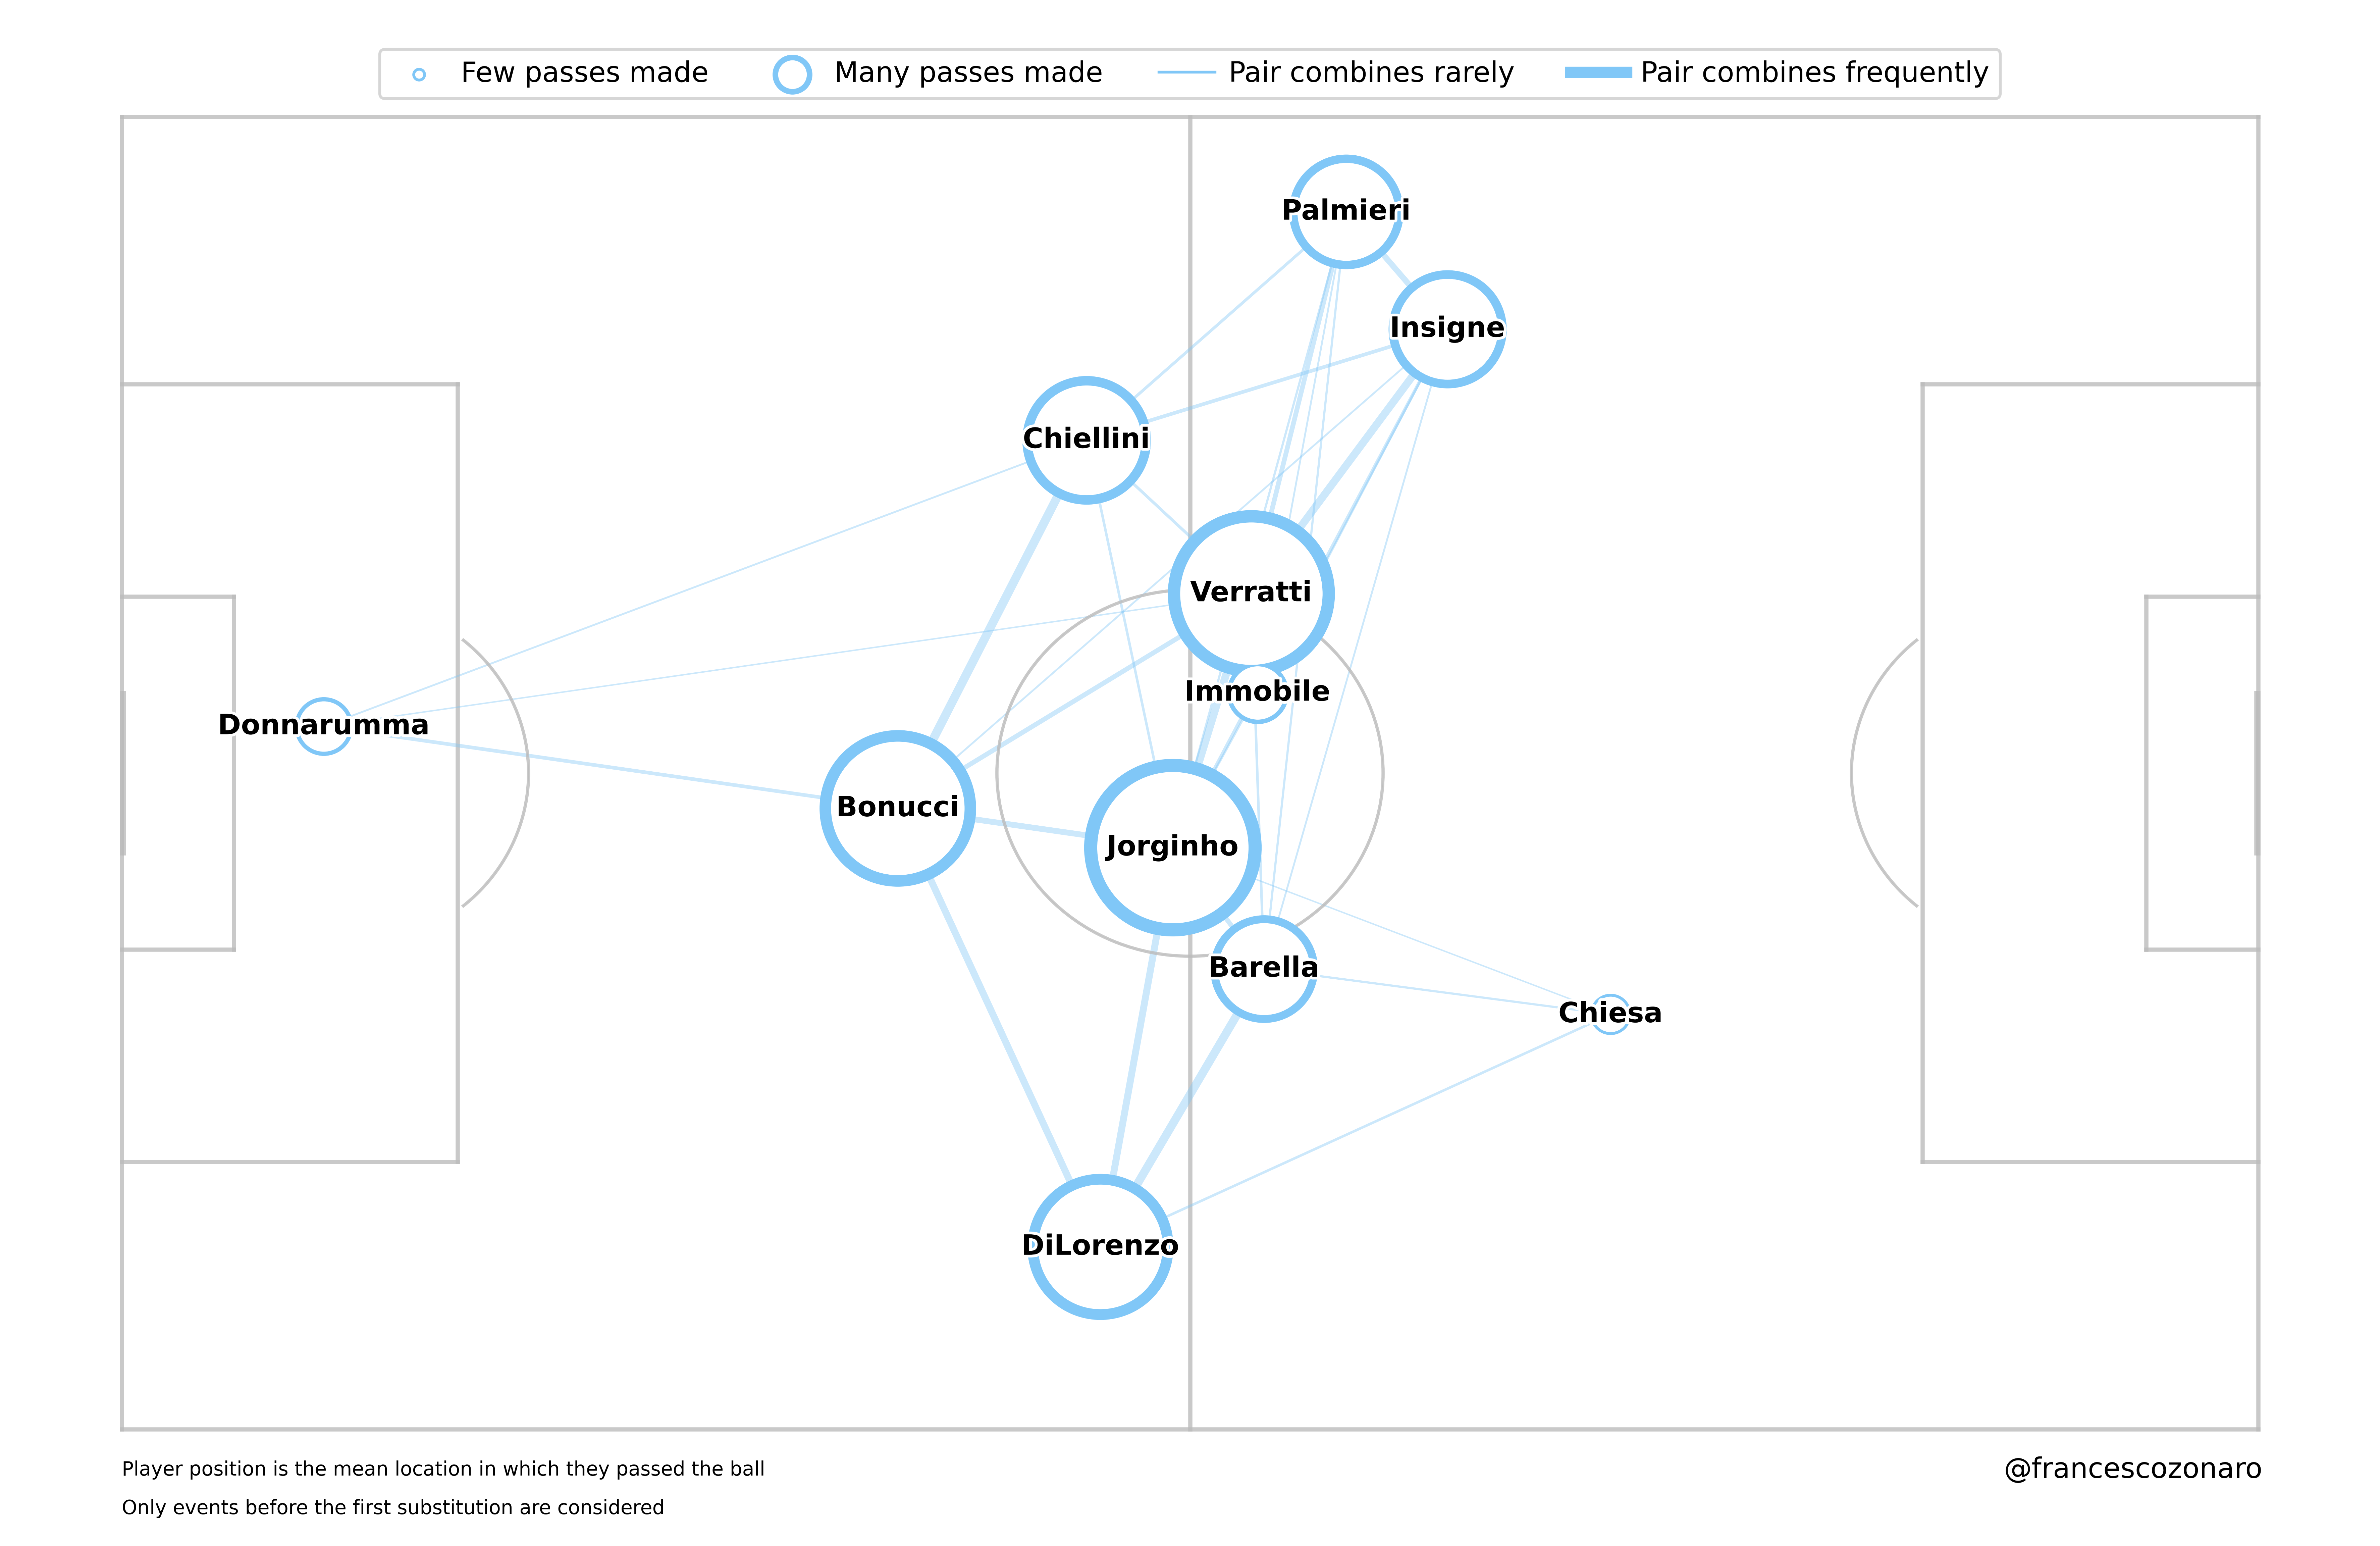

In [3]:
import statsbombplot as sbp

sbp.events.draw_passing_network(df, filename="ItalyPassingNetwork", marker_color=(0.5, 0.78, 0.97, 1))